In [34]:
import pandas as pd
from soil_fertility.components.data_ingestion import DataIngestion
from soil_fertility.components.data_transformation.data_transformation_part2 import DataTransformationTwo
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [35]:
data_path= "/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/data/Dataset2.csv"

In [36]:
obj = DataIngestion()

part,train_path,test_path= obj.init_ingestion(
    data_path
)

In [37]:
print("part : ",part)
print("train_path : ",Path(train_path))
print("test_path : ",Path(test_path))

part :  1
train_path :  /home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/artifacts/raw/1/train.csv
test_path :  /home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/artifacts/raw/1/test.csv


# Transformation

In [38]:
transformation_obj=DataTransformationTwo()
part,preprocessor,data_path=transformation_obj.transform(data_path)

In [39]:
df=pd.read_csv(data_path)

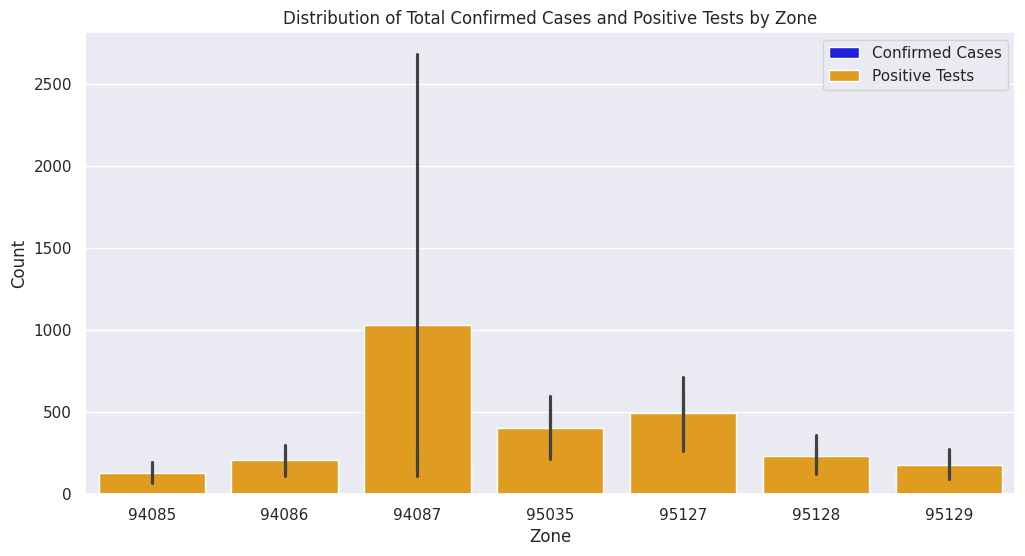

In [40]:
plt.figure(figsize=(12, 6))

sns.barplot(x='zcta', y='case count', data=df, color='blue', label='Confirmed Cases')
sns.barplot(x='zcta', y='positive tests', data=df, color='orange', label='Positive Tests')

plt.xlabel('Zone')
plt.ylabel('Count')
plt.title('Distribution of Total Confirmed Cases and Positive Tests by Zone')
plt.legend()
plt.show()


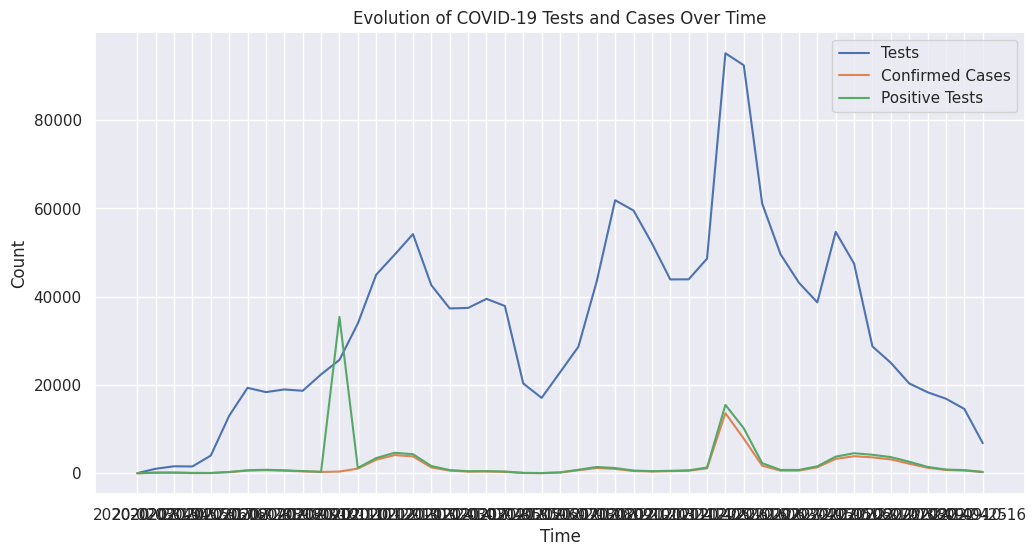

In [41]:
# Group by 'Start date' and sum the values
df_time = df.groupby('Start date')[['test count', 'case count', 'positive tests']].sum()

plt.figure(figsize=(12, 6))

plt.plot(df_time.index, df_time['test count'], label='Tests')
plt.plot(df_time.index, df_time['case count'], label='Confirmed Cases')
plt.plot(df_time.index, df_time['positive tests'], label='Positive Tests')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Evolution of COVID-19 Tests and Cases Over Time')
plt.legend()
plt.show()



In [42]:
df['Year'] = df['Start date'].dt.year

# Group by 'zcta' and 'Year' and sum the values
df_zone_year = df.groupby(['zcta', 'Year'])['positive tests'].sum().unstack()

df_zone_year.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Zone')
plt.ylabel('Positive Tests Count')
plt.title('Distribution of Positive COVID-19 Cases by Zone and Year')
plt.legend(title='Year')
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df['Population/Test Ratio'] = df['population'] / df['test count']

plt.figure(figsize=(10, 6))
plt.scatter(df['Population/Test Ratio'], df['zcta'], color='blue', alpha=0.5)
plt.xlabel('Population/Test Ratio')
plt.ylabel('Zone')
plt.title('Rapport entre la Population et le Nombre de Tests par Zone')
plt.show()
